## INSTRUCTIONS - IMPORTANT:

Every student is expected to submit their own, original solutions for this assignment. While collaborative discussions among classmates are encouraged for better understanding, it is crucial that the work you submit is your own. Copying or replicating someone else's solutions is a breach of academic integrity and will not be tolerated. The use of **AI tools** is also **prohibited** for this assignment.

The dataset used in this assignment is derived from Inside Airbnb, available [here](http://data.insideairbnb.com/the-netherlands/north-holland/amsterdam/2023-06-05/visualisations/listings.csv). It is licensed under a [Creative Commons Attribution 4.0 International License](https://creativecommons.org/licenses/by/4.0/).

**Please note that this dataset has been modified and adapted for the scope of this academic assignment. If you are interested in the original data or further Airbnb datasets, we encourage you to visit Inside Airbnb's website: [insideairbnb.com](http://insideairbnb.com).**


<h3> This assignment is divided into two main components: </h3>

1. **Data Manipulation**: Focused on cleaning and preparing the dataset.
2. **Exploratory Data Analysis (EDA)**: Concentrated on analyzing and interpreting the data.

# PART-1 (Data Cleaning and Manipulation)

We will begin by importing the required modules and reading the data file.

In [376]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn import preprocessing
import pandas as pd
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

In [378]:
df = pd.read_csv("airbnb_final.csv")

In [322]:
df.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159.0,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
1,59484.0,Centrum-Oost,52.36407,4.89393,Private room,106.0,1.0,0.0,Townhouse,Amsterdam,4.44,1.0,1.0,NaN,private
2,1100324.0,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161.0,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647.0,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private


### 1.1. **What is the shape of the dataset?**

In [323]:
#Code goes here
df.shape


(7608, 15)

### 1.2 **Identify the data types of each column. Are there any columns that need type conversion?**

In [324]:
# 1.2.1 Code to identify data types goes here.
df.dtypes



host_id             float64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object

In [326]:
for index,row in df.iterrows():
    if row['host_id']==None or not np.isfinite(row['host_id']):
        df.drop(index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(7602, 15)

In [328]:
# 1.2.3 change the host_id column to an integer 
df['host_id']=df['host_id'].astype(int)
print(df.head)
df.dtypes


<bound method NDFrame.head of         host_id                           neighbourhood   latitude  longitude  \
0          3159  Oostelijk Havengebied - Indische Buurt  52.364350   4.943580   
1         59484                            Centrum-Oost  52.364070   4.893930   
2       1100324                 De Pijp - Rivierenbuurt  52.351500   4.896560   
3        748161                                Oud-Oost  52.364200   4.928290   
4         97647                            Centrum-West  52.387610   4.891880   
...         ...                                     ...        ...        ...   
7597   16570501                  De Baarsjes - Oud-West  52.362909   4.866164   
7598  132654754                                  Osdorp  52.354460   4.791710   
7599   23932215                  De Baarsjes - Oud-West  52.363597   4.858541   
7600    4437313                                    Zuid  52.349906   4.860463   
7601   70167802                  De Baarsjes - Oud-West  52.372179   4.847902  

host_id               int64
neighbourhood        object
latitude            float64
longitude           float64
room_type            object
price in $          float64
minimum_nights      float64
availability_365    float64
Apartment_type       object
City                 object
Rating              float64
No_of_bed_rooms     float64
No_of_beds          float64
No_of_bathrooms     float64
Bathroom_type        object
dtype: object

### 1.3. **Are there any duplicate rows in the dataset? If yes, how would you handle them?**

In [329]:
# 1.3.1 check for duplicate values
duplicate_rows = df[df.duplicated()]
if duplicate_rows.empty:
    print("There were no duplicate rows.")
else:
    print("Duplicate rows were found:")
    print(duplicate_rows)


There were no duplicate rows.


### 1.4. **Check for missing values, How would you handle the missing values in the dataset?**

In [331]:
# 1.4.1 check for missing values
missing_values = df.isnull().sum()
print("Missing values from columns:")
print(missing_values)

Missing values from columns:
host_id                0
neighbourhood          0
latitude               4
longitude              6
room_type              0
price in $             9
minimum_nights         8
availability_365       1
Apartment_type         1
City                   1
Rating              1578
No_of_bed_rooms      284
No_of_beds            17
No_of_bathrooms      803
Bathroom_type          1
dtype: int64


In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7602 entries, 0 to 7601
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   host_id           7602 non-null   int64  
 1   neighbourhood     7602 non-null   object 
 2   latitude          7598 non-null   float64
 3   longitude         7596 non-null   float64
 4   room_type         7602 non-null   object 
 5   price in $        7602 non-null   float64
 6   minimum_nights    7594 non-null   float64
 7   availability_365  7601 non-null   float64
 8   Apartment_type    7601 non-null   object 
 9   City              7602 non-null   object 
 10  Rating            6024 non-null   float64
 11  No_of_bed_rooms   7318 non-null   float64
 12  No_of_beds        7585 non-null   float64
 13  No_of_bathrooms   6799 non-null   float64
 14  Bathroom_type     7601 non-null   object 
dtypes: float64(9), int64(1), object(5)
memory usage: 891.0+ KB


In [211]:
# 1.4.3 Populate missing values in the 'price in $' column with the mean.
mean_price = df['price in $'].mean()
df['price in $'].fillna(mean_price, inplace=True)

In [314]:
# 1.4.4 Verify that there are no more missing values in the 'price in $' column
missing_values = df['price in $'].isnull().sum()

if missing_values == 0:
    print("The 'price in $' column contains no missing values.")
else:
    print(f"The 'price in $' column has {missing_values} missing values.")


The 'price in $' column contains no missing values.


In [213]:
# 1.4.5 Populate all missing values in the City column with "Amsterdam"
df['City'].fillna("Amsterdam", inplace=True)

In [315]:
# 1.4.6 Verify that there are no more missing values in the 'City' column
missing_values = df['City'].isnull().sum()

if missing_values == 0:
    print("The 'City' column contains no missing values.")
else:
    print(f"The 'City' column has {missing_values} missing values.")

The 'City' column contains no missing values.


In [316]:
# 1.4.7 Drop all remaining rows with missing data. Store the result in a new dataframe called df2.
df2 = df.dropna()

In [317]:
df2.head()

,host_id,neighbourhood,latitude,longitude,room_type,price in $,minimum_nights,availability_365,Apartment_type,City,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
0,3159,Oostelijk Havengebied - Indische Buurt,52.36435,4.94358,Private room,69.0,3.0,7.0,Condo,Amsterdam,4.89,1.0,1.0,1.5,shared
2,1100324,De Pijp - Rivierenbuurt,52.35150,4.89656,Entire home/apt,270.0,4.0,2.0,Rental unit,Amsterdam,4.86,3.0,3.0,1.5,private
3,748161,Oud-Oost,52.36420,4.92829,Entire home/apt,200.0,3.0,0.0,Rental unit,Amsterdam,4.76,1.0,1.0,1.5,private
4,97647,Centrum-West,52.38761,4.89188,Private room,137.0,3.0,0.0,Houseboat,Amsterdam,4.94,1.0,1.0,1.5,private
5,776296,De Baarsjes - Oud-West,52.36270,4.85693,Entire home/apt,170.0,3.0,157.0,Rental unit,Amsterdam,4.77,1.0,1.0,1.0,private


### 1.5. Compare the shapes of the original (df) and new (df2) dataframes, and verify there are no missing values in df2.

In [318]:
# 1.5.1 code to show shapes of old and new dataframes
print("Shape of the old DataFrame (df):", df.shape)
print("Shape of the new DataFrame (df2):", df2.shape)


Shape of the old DataFrame (df): (7602, 15)
Shape of the new DataFrame (df2): (5104, 15)


In [319]:
# 1.5.2 Code to verify no missing values
df2_missing_values = df2.isna().sum()
if df2_missing_values.sum() == 0:
    print("In df2, there are no missing values.")
else:
    print("There are still missing values in df2.")


In df2, there are no missing values.


### 1.6. **Drop the 'latitude' and 'longitude' columns. How does it affect the shape of the dataset?**

In [335]:
# 1.6.1 Code goes here
df2 = df2.drop('latitude', axis=1)
df2 = df2.drop('longitude', axis=1)

In [336]:
# 1.6.2 Show new shape
df2.shape

(5104, 13)

### 1.7. **List the  unique values in Apartment_type and Bathroom_type**

In [337]:
# 1.7.1 Find and list the unique apartment tpyes.
unique_apartment_types = df2['Apartment_type'].unique()
print("Unique values in 'Apartment_type':")
for value in unique_apartment_types:
    print(value)


Unique values in 'Apartment_type':
Condo
Rental unit
Houseboat
Boutique hotel
Guest suite
Home
Loft
Boat
Bed and breakfast
Townhouse
Chalet
Guesthouse
Farm stay
Serviced apartment
Barn
Hotel
Cabin
Villa
Place to stay
Tiny home
Cottage
Nature lodge
Tower
Hostel
Aparthotel
Camper/RV
Earthen home
casa particular
Vacation home
Tent


In [338]:
# 1.7.2 Find and list the unuque bathroom types.
unique_bathroom_types = df2['Bathroom_type'].unique()
print("\nUnique values in 'Bathroom_type':")
for value in unique_bathroom_types:
    print(value)


Unique values in 'Bathroom_type':
shared
private


### 1.8. **Replace the bathroom types (shared and private) with integers (0 and 1).**

In [339]:
# 1.8.1 Replace the strings with integers
df2['Bathroom_type'] = df2['Bathroom_type'].replace({'shared': 0, 'private': 1})


In [340]:
# 1.8.2 Verify the changes
print(df2['Bathroom_type'].unique())

[0 1]


# Part - 2 (Exploratory Data Analysis)

Exploratory Data Analysis refers to the critical process of performing initial investigations on data so as to discover patterns,to spot anomalies,to test hypothesis and to check assumptions with the help of summary statistics and graphical representations.

### 2.1. **Describe the data.**

In [341]:
# Describe data here.
print(df2.describe())

            host_id    price in $  minimum_nights  availability_365  \
count  5.104000e+03   5104.000000     5104.000000       5104.000000   
mean   8.964374e+07    250.073054        5.346395         68.918887   
std    1.283541e+08    239.660144       40.143544        100.887118   
min    3.159000e+03     18.000000        1.000000          0.000000   
25%    8.976036e+06    149.000000        2.000000          0.000000   
50%    2.952562e+07    205.500000        3.000000         12.000000   
75%    1.054610e+08    300.000000        4.000000        114.250000   
max    5.126757e+08  10000.000000     1001.000000        365.000000   

            Rating  No_of_bed_rooms   No_of_beds  No_of_bathrooms  \
count  5104.000000      5104.000000  5104.000000      5104.000000   
mean      4.828893         1.614028     1.614028         1.316712   
std       0.214185         0.890171     0.890171         0.467813   
min       1.670000         1.000000     1.000000         0.000000   
25%       4.750

### 2.2. **Identify significant correlations.**

In [342]:
# 2.2.1 Build the correlation matrix
df2.corr()

/tmp/ipykernel_6521/897761748.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df2.corr()


,host_id,price in $,minimum_nights,availability_365,Rating,No_of_bed_rooms,No_of_beds,No_of_bathrooms,Bathroom_type
host_id,1.000000,0.042415,-0.009998,0.164926,-0.164828,-0.070505,-0.070505,-0.046543,-0.066348
price in $,0.042415,1.000000,-0.003077,0.171696,0.045005,0.293011,0.293011,0.266879,0.171677
minimum_nights,-0.009998,-0.003077,1.000000,0.011573,0.011770,0.005875,0.005875,-0.004857,0.002643
availability_365,0.164926,0.171696,0.011573,1.000000,-0.167133,-0.065232,-0.065232,-0.027974,-0.178747
Rating,-0.164828,0.045005,0.011770,-0.167133,1.000000,0.035777,0.035777,0.072665,0.174212
No_of_bed_rooms,-0.070505,0.293011,0.005875,-0.065232,0.035777,1.000000,1.000000,0.475245,0.188659
No_of_beds,-0.070505,0.293011,0.005875,-0.065232,0.035777,1.000000,1.000000,0.475245,0.188659
No_of_bathrooms,-0.046543,0.266879,-0.004857,-0.027974,0.072665,0.475245,0.475245,1.000000,0.102280
Bathroom_type,-0.066348,0.171677,0.002643,-0.178747,0.174212,0.188659,0.188659,0.102280,1.000000


/tmp/ipykernel_6521/2792364054.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),


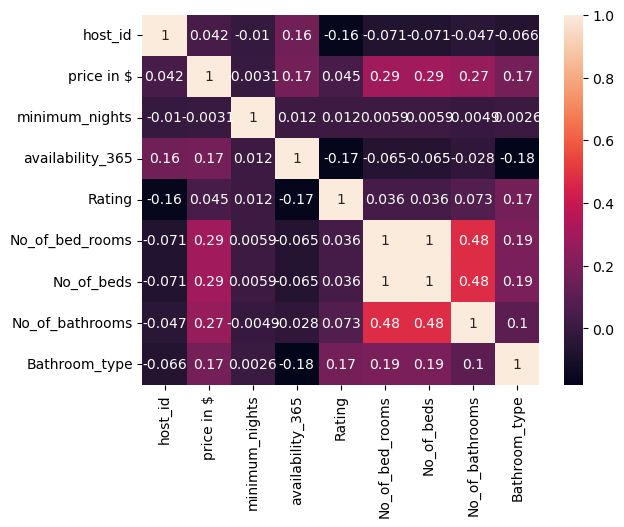

/tmp/ipykernel_6521/2792364054.py:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr().drop(


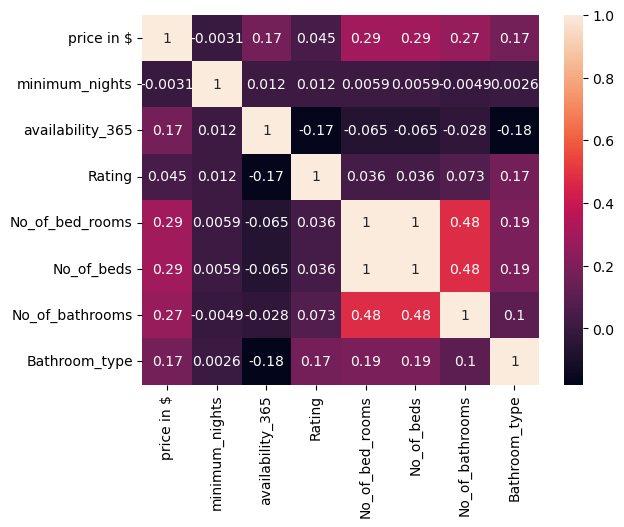

In [343]:
# 2.2.2 Display the correlation matrix as a heatmap
sns.heatmap(df2.corr(),
            annot = True);
plt.show()
sns.heatmap(df2.corr().drop(
  ['host_id'], axis=1).drop(['host_id'], axis=0),
            annot = True);
 
plt.show()


### 2.3. **Check if is there any multicollinearity.**

In [344]:
#Import the statsmodels tools needed to perform VIF.
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant
import numpy as np

In [345]:
# 2.3.1 Select all numerical columns *except* host_id.
df.replace([np.inf, -np.inf], np.nan, inplace=True)
numerical_columns = df.select_dtypes(include=[np.number]).drop(columns=['host_id'])



In [346]:
# 2.3.2 Make sure there are no missing (NaN) values 
numerical_columns=numerical_columns.dropna()
missing_values = numerical_columns.isnull().sum()
columns_with_missing_values = missing_values[missing_values > 0]
if columns_with_missing_values.empty:
    print("No missing values in selected numerical columns.")
else:
    print("Columns with missing values:")
    print(columns_with_missing_values)    



No missing values in selected numerical columns.


In [347]:
# 2.3.3 Add a constant column for the VIF calculation
numerical_columns_with_const = sm.add_constant(numerical_columns)


In [348]:
# 2.3.4 Calculate the VIF for each of the columns and display the information.
vif = pd.DataFrame()
vif["Feature"] = numerical_columns_with_const.columns
vif["VIF"] = [variance_inflation_factor(numerical_columns_with_const.values, i) for i in range(numerical_columns_with_const.shape[1])]
print(vif)

            Feature           VIF
0             const  9.720623e+06
1          latitude  1.019756e+00
2         longitude  1.039984e+00
3        price in $  1.174934e+00
4    minimum_nights  1.000616e+00
5  availability_365  1.080359e+00
6            Rating  1.038177e+00
7   No_of_bed_rooms           inf
8        No_of_beds           inf
9   No_of_bathrooms  1.333425e+00


/Users/PC/anaconda3/lib/python3.11/site-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


### 2.4. **Spot outliers in the dataset.**
(we will not remove outliers for this homework).

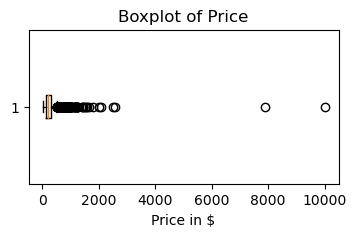

In [351]:
# 2.4.1. Show boxplot of price in $ 
plt.figure(figsize=(4, 2))
plt.boxplot(df2['price in $'], vert=False)
plt.title('Boxplot of Price')
plt.xlabel('Price in $')
plt.show()

In [353]:
# 2.4.2 Show the maximum price in $
print("Maximum Price in $:", df['price in $'].max())

Maximum Price in $: 12000.0


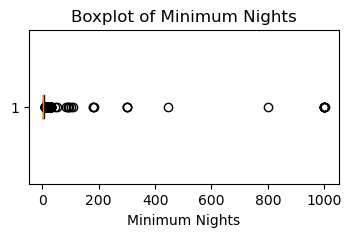

In [354]:
# 2.4.3 Show a boxplot for minimum_nights
plt.figure(figsize=(4, 2))
plt.boxplot(df2['minimum_nights'], vert=False)
plt.title('Boxplot of Minimum Nights')
plt.xlabel('Minimum Nights')
plt.show()

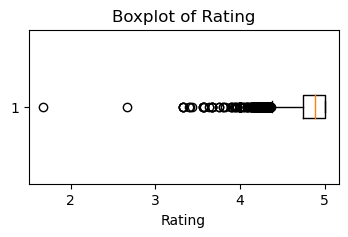

In [355]:
# 2.4.4 Show a boxplot for Rating

plt.figure(figsize=(4, 2))
plt.boxplot(df2['Rating'], vert=False)
plt.title('Boxplot of Rating')
plt.xlabel('Rating')
plt.show()

In [356]:
# 2.4.5 Define a function to drop outliers beyond a specific multiplier of the IQR.
def drop_outliers_function(dataframe, column, iqr_multiplier=1.5):
    Q1 = dataframe[column].quantile(0.25)
    Q3 = dataframe[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - iqr_multiplier * IQR
    upper_bound = Q3 + iqr_multiplier * IQR
    outliers_mask = (dataframe[column] < lower_bound) | (dataframe[column] > upper_bound)
    return dataframe[~outliers_mask]

In [362]:
# 2.4.6 Find outliers for 'price in $', 'minimum_nights', and 'Rating' using the standard multiplier (1.5)
standard_multiplier = 1.5
price_of_outliers = df[(df['price in $'] < df['price in $'].quantile(0.25) - standard_multiplier * (df['price in $'].quantile(0.75) - df['price in $'].quantile(0.25))) |
                    (df['price in $'] > df['price in $'].quantile(0.75) + standard_multiplier * (df['price in $'].quantile(0.75) - df['price in $'].quantile(0.25)))]
minimum_nights_outliers = df[(df['minimum_nights'] < df['minimum_nights'].quantile(0.25) - standard_multiplier * (df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25))) |
                              (df['minimum_nights'] > df['minimum_nights'].quantile(0.75) + standard_multiplier * (df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25)))]
rating_outliers = df[(df['Rating'] < df['Rating'].quantile(0.25) - standard_multiplier * (df['Rating'].quantile(0.75) - df['Rating'].quantile(0.25))) |
                    (df['Rating'] > df['Rating'].quantile(0.75) + standard_multiplier * (df['Rating'].quantile(0.75) - df['Rating'].quantile(0.25)))]
print("Outliers for 'price in $':")
print(price_of_outliers['price in $'])

print("\nOutliers for 'minimum_nights':")
print(minimum_nights_outliers['minimum_nights'])

print("\nOutliers for 'Rating':")
print(rating_outliers['Rating'])

Outliers for 'price in $':
14       675.0
37      1036.0
38       633.0
59      1239.0
128      800.0
         ...  
7546     750.0
7563     680.0
7568     760.0
7583     700.0
7589     631.0
Name: price in $, Length: 352, dtype: float64

Outliers for 'minimum_nights':
15      14.0
24       9.0
26      21.0
42      30.0
51      28.0
        ... 
7467    14.0
7471    28.0
7495    30.0
7511    14.0
7572    14.0
Name: minimum_nights, Length: 322, dtype: float64

Outliers for 'Rating':
57      4.30
119     4.27
141     4.36
144     4.33
228     4.19
        ... 
7179    4.18
7204    4.33
7277    4.33
7296    4.33
7359    3.67
Name: Rating, Length: 254, dtype: float64


In [359]:
# 2.4.7 Display the count of outliers in each selected column
print("Outliers for 'price in $':")
print(len(price_of_outliers))

print("\nOutliers for 'minimum_nights':")
print(len(minimum_nights_outliers))

print("\nOutliers for 'Rating':")
print(len(rating_outliers))

Outliers for 'price in $':
352

Outliers for 'minimum_nights':
322

Outliers for 'Rating':
254


In [363]:
# 2.4.8 Find outliers for the same column using a multiplier of 3.
multiplier = 3
price_of_outliers_3x = df[(df['price in $'] < df['price in $'].quantile(0.25) - multiplier * (df['price in $'].quantile(0.75) - df['price in $'].quantile(0.25))) |
                        (df['price in $'] > df['price in $'].quantile(0.75) + multiplier * (df['price in $'].quantile(0.75) - df['price in $'].quantile(0.25)))]

minimum_nights_outliers_3x = df[(df['minimum_nights'] < df['minimum_nights'].quantile(0.25) - multiplier * (df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25))) |
                              (df['minimum_nights'] > df['minimum_nights'].quantile(0.75) + multiplier * (df['minimum_nights'].quantile(0.75) - df['minimum_nights'].quantile(0.25)))]

rating_outliers_3x = df[(df['Rating'] < df['Rating'].quantile(0.25) - multiplier * (df['Rating'].quantile(0.75) - df['Rating'].quantile(0.25))) |
                    (df['Rating'] > df['Rating'].quantile(0.75) + multiplier * (df['Rating'].quantile(0.75) - df['Rating'].quantile(0.25)))]
print("Outliers for 'price in $' (3x multiplier):")
print(price_of_outliers_3x['price in $'])

print("\nOutliers for 'minimum_nights' (3x multiplier):")
print(minimum_nights_outliers_3x['minimum_nights'])

print("\nOutliers for 'Rating' (3x multiplier):")
print(rating_outliers_3x['Rating'])

Outliers for 'price in $' (3x multiplier):
37      1036.0
59      1239.0
128      800.0
187      950.0
190      970.0
         ...  
7377    1120.0
7378    1120.0
7380    1200.0
7485     760.0
7568     760.0
Name: price in $, Length: 124, dtype: float64

Outliers for 'minimum_nights' (3x multiplier):
15      14.0
26      21.0
42      30.0
51      28.0
128     30.0
        ... 
7467    14.0
7471    28.0
7495    30.0
7511    14.0
7572    14.0
Name: minimum_nights, Length: 242, dtype: float64

Outliers for 'Rating' (3x multiplier):
1046    3.91
2760    3.43
2880    3.71
4032    3.41
4373    3.78
4417    3.57
4432    3.75
4492    3.86
4523    3.63
4525    3.75
4526    1.67
4529    3.67
4534    3.94
4798    3.96
4842    3.40
4884    3.58
4895    3.89
4897    3.33
5149    3.50
5190    3.80
5195    3.89
5325    3.67
5365    3.56
5450    3.93
5595    3.80
5597    3.58
5691    3.83
5694    3.33
5703    3.75
5837    3.57
6122    3.33
6233    3.67
6323    2.67
6357    3.97
6554    3.67
6908    3.

In [361]:
# 2.4.9 Display the new count of outliers in each selected column
print("Outliers for 'price in $' (3x multiplier):")
print(len(price_of_outliers_3x))

print("\nOutliers for 'minimum_nights' (3x multiplier):")
print(len(minimum_nights_outliers_3x))

print("\nOutliers for 'Rating' (3x multiplier):")
print(len(rating_outliers_3x))

Outliers for 'price in $' (3x multiplier):
124

Outliers for 'minimum_nights' (3x multiplier):
242

Outliers for 'Rating' (3x multiplier):
37


### 2.5. **Compute the Average Price for Each Type of Listing.**

In [364]:
# 2.5.1 Group the data by 'room_type' and calculate the average price for each type
average_price_by_room_type = df.groupby('room_type')['price in $'].mean().reset_index()

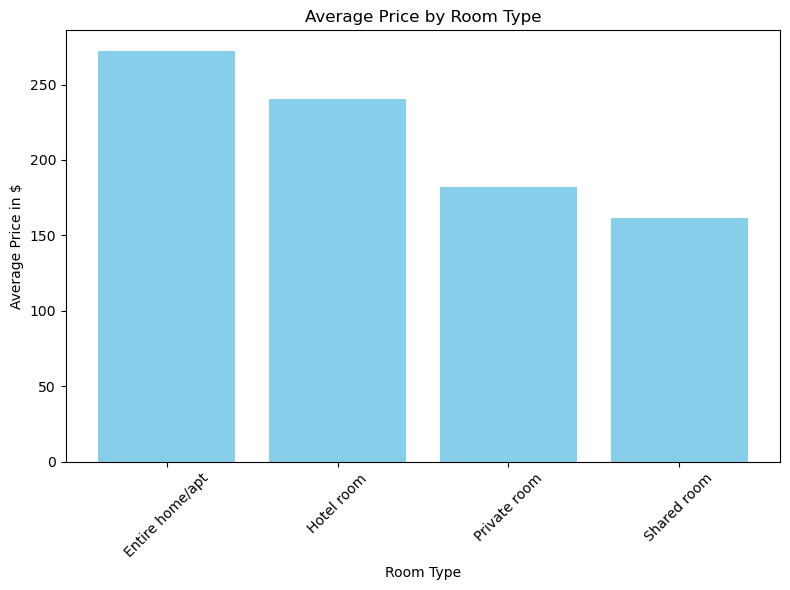

In [365]:
# 2.5.2 Plot and display  the average price for each room type
plt.figure(figsize=(8, 6))
plt.bar(average_price_by_room_type['room_type'], average_price_by_room_type['price in $'], color='skyblue')
plt.xlabel('Room Type')
plt.ylabel('Average Price in $')
plt.title('Average Price by Room Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 2.6. **How Many Listings Are There for Each Unique 'Apartment Type'?**

In [366]:
# 2.6.1 Count the frequency of each unique 'Apartment_type'
apartment_type_counts = df['Apartment_type'].value_counts()
print(apartment_type_counts)


Rental unit           3380
Condo                 1597
Home                   703
Townhouse              312
Bed and breakfast      310
Houseboat              240
Loft                   233
Boat                   144
Hotel                  118
Guest suite            109
Serviced apartment     106
Boutique hotel         102
Hostel                  56
Villa                   35
Guesthouse              33
Aparthotel              20
Place to stay           20
Vacation home           19
casa particular         17
Tiny home               10
Cabin                    9
Earthen home             5
Farm stay                5
Camper/RV                3
Tent                     3
Cottage                  3
Nature lodge             2
Chalet                   2
Tower                    1
Barn                     1
Cave                     1
Yurt                     1
Bungalow                 1
Name: Apartment_type, dtype: int64


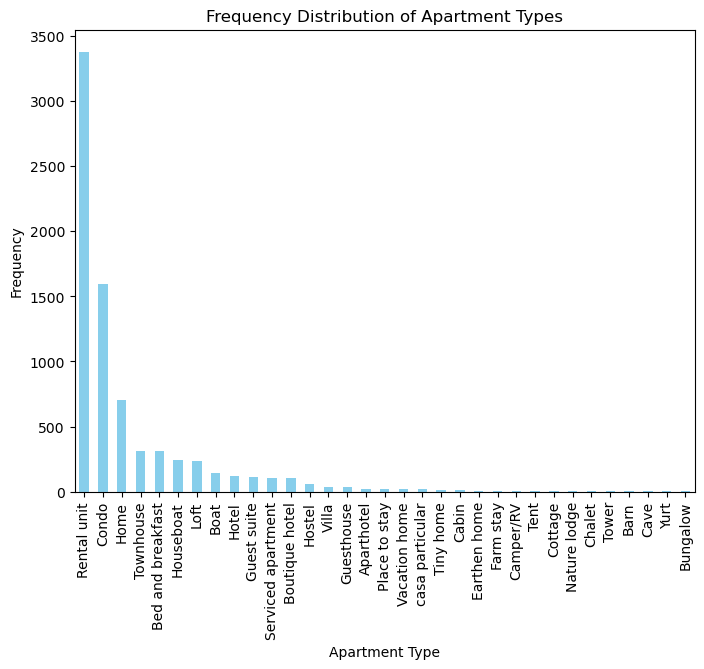

In [367]:
# 2.6.2 Plot the frequency distribution of 'Apartment_type'
plt.figure(figsize=(8, 6))
apartment_type_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.title('Frequency Distribution of Apartment Types')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.show()

In [370]:
# 2.6.3. Display the top 10 most common apartment types
top_10_apartment_types = apartment_type_counts.head(10)
print(top_10_apartment_types)

Rental unit          3380
Condo                1597
Home                  703
Townhouse             312
Bed and breakfast     310
Houseboat             240
Loft                  233
Boat                  144
Hotel                 118
Guest suite           109
Name: Apartment_type, dtype: int64


### 2.7. **Identify the Top 5 Neighbourhoods with the Highest Average Listing Prices.**

In [371]:
# 2.7.1 Find the top 5 most expensive neighbourhoods based on average price
average_price_by_neighbourhood = df.groupby('neighbourhood')['price in $'].mean().reset_index()

top_5_expensive_neighbourhoods = average_price_by_neighbourhood.sort_values(by='price in $', ascending=False).head(5)

print(top_5_expensive_neighbourhoods)

              neighbourhood  price in $
4              Centrum-Oost  308.946502
5              Centrum-West  302.739400
21                     Zuid  281.211765
8   De Pijp - Rivierenbuurt  266.092997
16                Oud-Noord  251.773913


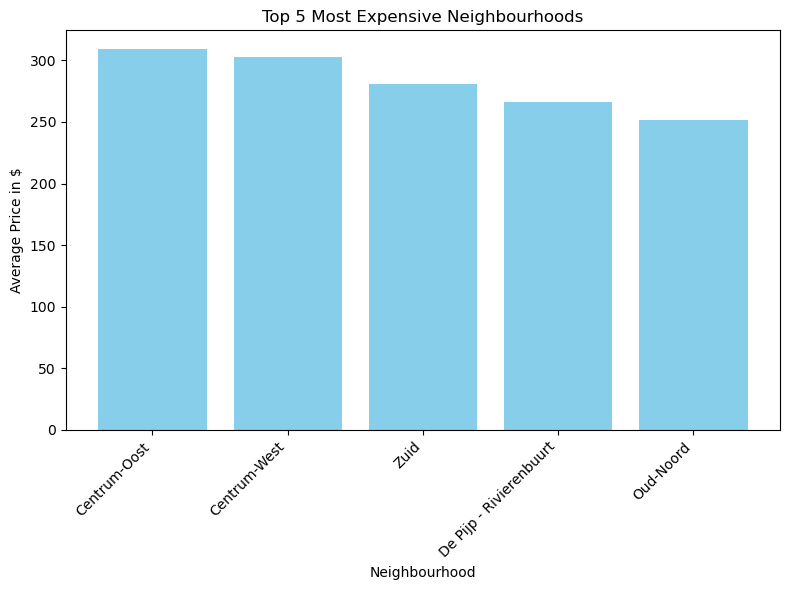

In [372]:
# 2.7.2. Plot and display the top 5 most expensive neighbourhoods
plt.figure(figsize=(8, 6))
plt.bar(top_5_expensive_neighbourhoods['neighbourhood'], top_5_expensive_neighbourhoods['price in $'], color='skyblue')
plt.xlabel('Neighbourhood')
plt.ylabel('Average Price in $')
plt.title('Top 5 Most Expensive Neighbourhoods')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2.8. **Which 'Apartment Types' Are Most and Least Frequently Available?**

In [373]:
# 2.8.1 Count the frequency of each unique 'Apartment_type' to find the most and least commonly available types
most_frequent_apartment_types = apartment_type_counts.sort_values(ascending=False)

least_frequent_apartment_types = apartment_type_counts.sort_values(ascending=True)

print("Most Frequently Available Apartment Types:")
print(most_frequent_apartment_types.head(1))

print("\nLeast Frequently Available Apartment Types:")
print(least_frequent_apartment_types.head(1))

Most Frequently Available Apartment Types:
Rental unit    3380
Name: Apartment_type, dtype: int64

Least Frequently Available Apartment Types:
Bungalow    1
Name: Apartment_type, dtype: int64


In [379]:
# 2.8.2 Find the top 5 most commonly available and the least commonly available apartment types
top_5_most_common = apartment_type_counts.head(5)
print("Top 5 most Frequently Available Apartment Types:")
print(top_5_most_common)

top_5_least_common = apartment_type_counts.tail(5)
print("\nTop 5east Frequently Available Apartment Types:")
print(top_5_least_common)


Top 5 most Frequently Available Apartment Types:
Rental unit          3380
Condo                1597
Home                  703
Townhouse             312
Bed and breakfast     310
Name: Apartment_type, dtype: int64

Top 5east Frequently Available Apartment Types:
Tower       1
Barn        1
Cave        1
Yurt        1
Bungalow    1
Name: Apartment_type, dtype: int64


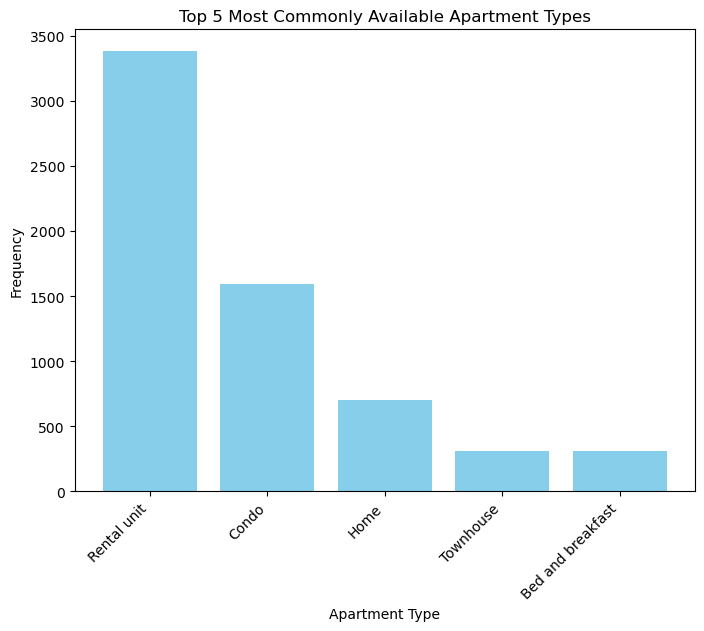

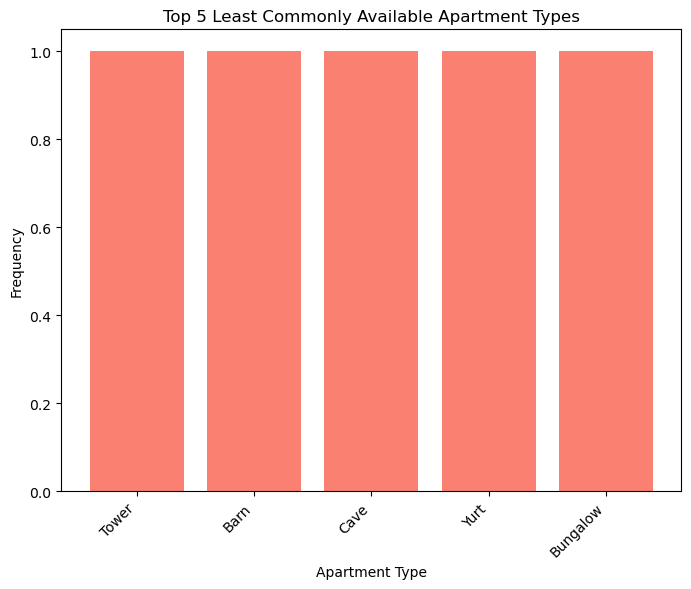

In [380]:
# 2.8.3 Plot and display the most and least commonly available apartment types
#Plot the most commonly available apartment types
plt.figure(figsize=(8, 6))
plt.bar(top_5_most_common.index, top_5_most_common.values, color='skyblue')
plt.title('Top 5 Most Commonly Available Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

# Plot the least commonly available apartment types
plt.figure(figsize=(8, 6))
plt.bar(top_5_least_common.index, top_5_least_common.values, color='salmon')
plt.title('Top 5 Least Commonly Available Apartment Types')
plt.xlabel('Apartment Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()